In [174]:
import plotly.graph_objects as go
import pickle
import pandas as pd

## Plotly plot for Category Food and Demographic Groups

In [175]:
df_demo = pd.read_csv("data/df_demo.csv")
list_group = ["hh_comp_desc","income_desc", "age_desc"]
dic_group = {}

for group in list_group:
    dic_group[group]= df_demo.groupby([group]).mean()

In [176]:
relevant_columns = df_demo.columns[5:df_demo.shape[1]-1]
dic_button = {}
for group in list_group:
    button_list = []
    for col in relevant_columns:
        button_list.append(dict(label=col,
                         method="update",
                         args=[{"x": [dic_group[group][col].index], "y": [dic_group[group][col].values]}]))
    dic_button[group] = button_list

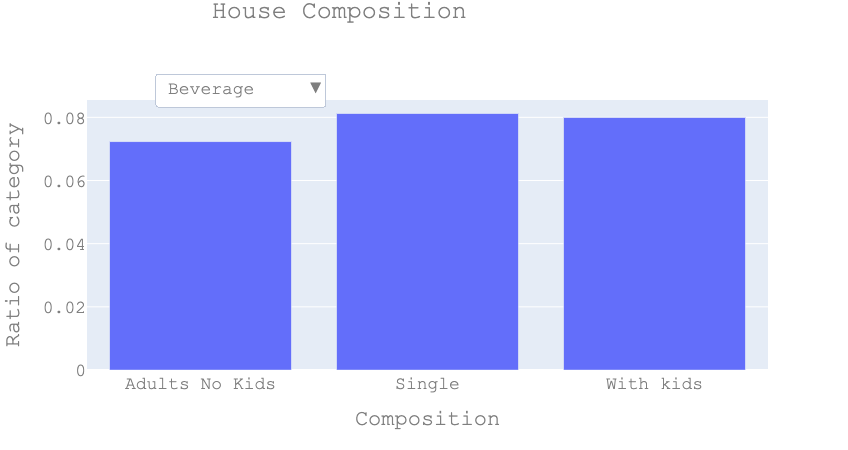

In [177]:
# Composition plot
group = "hh_comp_desc"
fig1 = go.Figure()
fig1.add_trace(
    go.Bar(x=dic_group[group]["Beverage"].index,
               y=dic_group[group]["Beverage"].values,
               name="High"))
fig1.update_layout(
    updatemenus=[
        go.layout.Updatemenu(
            active=0,
            buttons=dic_button["hh_comp_desc"],
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        )
    ])
fig1.update_layout(
    title={
        'text': "House Composition",
        'y':1,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Composition",
    yaxis_title="Ratio of category",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)

In [178]:
import plotly.io as pio
pio.write_html(fig1, 'data/test.html')

## Plotly campaign amount view

In [179]:
# Plot amount of coupons distributed and redeemed
df_campaign = pd.read_pickle("data/df_campaign_desc.pickle")

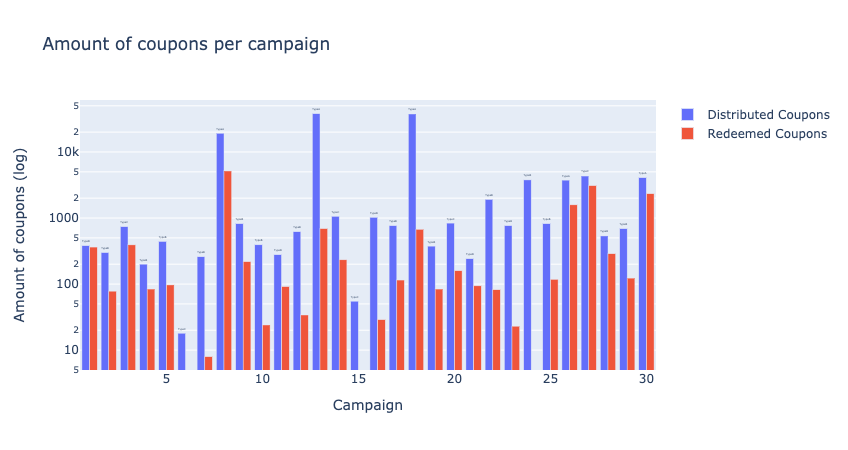

In [180]:
fig2 = go.Figure()
fig2.add_trace(
    go.Bar(x=df_campaign.index,
           y=df_campaign.distributed,
           name="Distributed Coupons",
           textposition = "outside",
           text = df_campaign.description,
           textfont=dict(
            size=18)))
fig2.add_trace(
    go.Bar(x=df_campaign.index,
               y=df_campaign.redeemed,
               name="Redeemed Coupons"))
fig2.update_layout(yaxis_type="log")
fig2.update_layout(
    title={'text': "Amount of coupons per campaign",},
    xaxis_title="Campaign",
    yaxis_title="Amount of coupons (log)")

In [181]:
pio.write_html(fig2, 'data/campaign_overview.html')

In [182]:
df_camp_type= df_campaign.groupby("description")

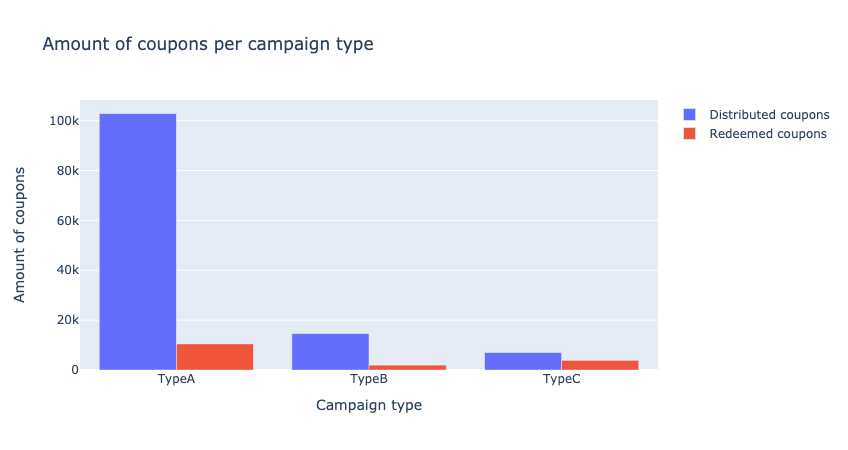

In [183]:
fig3 = go.Figure()
fig3.add_trace(
    go.Bar(x=df_camp_type["distributed"].sum().index,
               y=df_camp_type["distributed"].sum().values,
               name="Distributed coupons"))
fig3.add_trace(
    go.Bar(x=df_camp_type["redeemed"].sum().index,
               y=df_camp_type["redeemed"].sum().values,
               name="Redeemed coupons"))
fig3.update_layout(
    title={'text': "Amount of coupons per campaign type",},
    xaxis_title="Campaign type",
    yaxis_title="Amount of coupons")

In [184]:
df_campaign["ratio_redeemed"] = df_campaign.redeemed/df_campaign.distributed
df_camp_type= df_campaign.groupby("description")

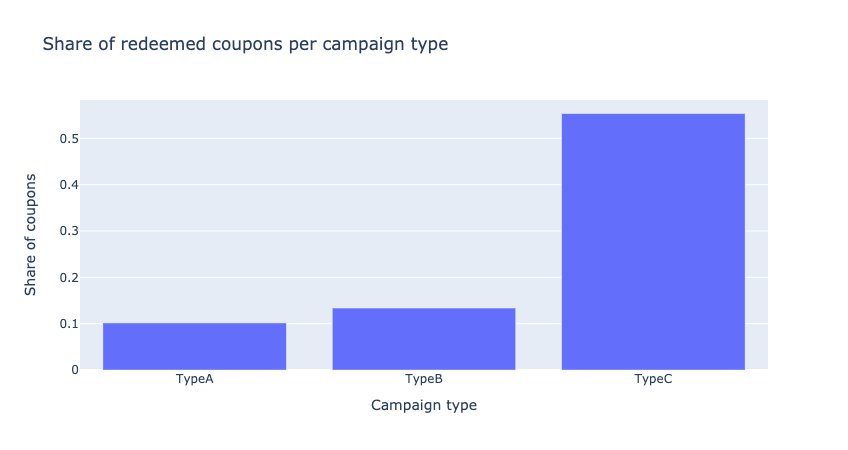

In [185]:
fig4 = go.Figure()
fig4.add_trace(
    go.Bar(x=df_camp_type["distributed"].mean().index,
               y=df_camp_type["redeemed"].sum().values/df_camp_type["distributed"].sum().values,
               name="Procentage share of redeemed coupons"))
fig4.update_layout(
    title={'text': "Share of redeemed coupons per campaign type",},
    xaxis_title="Campaign type",
    yaxis_title="Share of coupons")

## Plotly campaigns money view

In [186]:
df_money = pd.read_pickle("data/df_money_offered.pickle")

In [187]:
df_money["saved"] = df_money.redeemed.apply(lambda x : int(x))*df_money.coupon_disc
df_money_group = df_money.groupby("campaign")

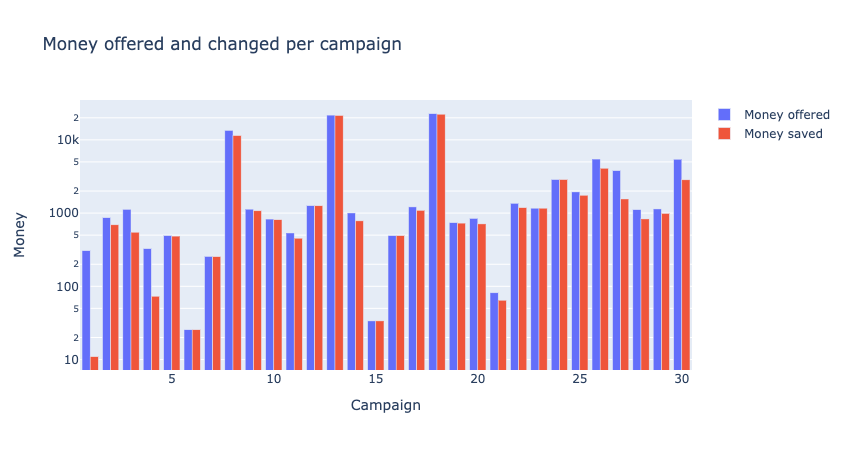

In [188]:
fig5 = go.Figure()
fig5.add_trace(
    go.Bar(x=df_money_group.coupon_disc.sum().index,
               y=df_money_group.coupon_disc.sum().values,
               name="Money offered"))
fig5.add_trace(
    go.Bar(x=df_money_group.saved.sum().index,
               y=df_money_group.saved.sum().values,
               name="Money saved"))
fig5.update_layout(yaxis_type="log")
fig5.update_layout(
    title={'text': "Money offered and changed per campaign",},
    xaxis_title="Campaign",
    yaxis_title="Money")

In [189]:
list_desc = [str(df_campaign.loc[x+1].description) for x in range(df_campaign.shape[0])]

In [190]:
df_money["camp_type"] = df_money.campaign.apply(lambda x:list_desc[x-1])

In [191]:
df_money_group = df_money.groupby("camp_type")

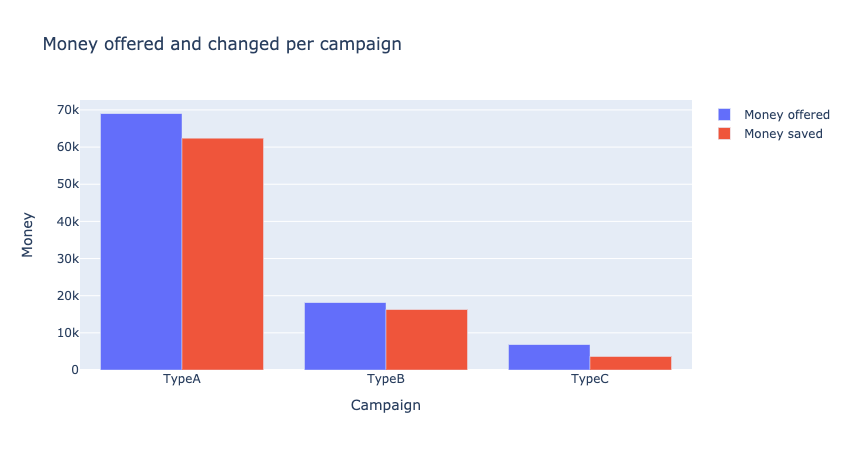

In [192]:
fig6 = go.Figure()
fig6.add_trace(
    go.Bar(x=df_money_group.coupon_disc.sum().index,
               y=df_money_group.coupon_disc.sum().values,
               name="Money offered"))
fig6.add_trace(
    go.Bar(x=df_money_group.saved.sum().index,
               y=df_money_group.saved.sum().values,
               name="Money saved"))
#fig6.update_layout(yaxis_type="log")
fig6.update_layout(
    title={'text': "Money offered and changed per campaign",},
    xaxis_title="Campaign",
    yaxis_title="Money")

In [193]:
df_money.coupon_disc.value_counts()[0]/df_money.shape[0]

0.983740900225119

In [194]:
df_props = pd.read_pickle("data/df_for_thanh.pickle")

In [195]:
df_props = df_props.transpose()

In [196]:
list_col = list(df_props.columns)

In [197]:
bar_list = []
for col in df_props:
    bar_list.append(go.Bar(name=col, x=df_props.index, y=df_props[col].values))

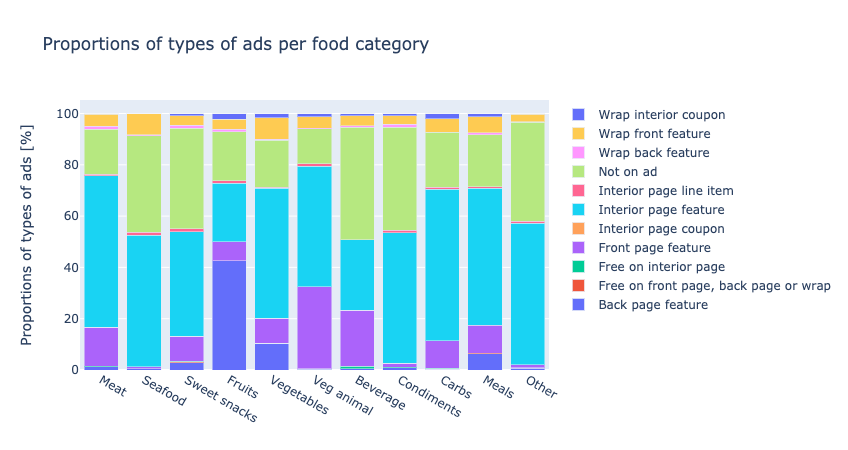

In [199]:
fig7 = go.Figure(data=bar_list, )
fig7.update_layout(barmode='stack')
fig7.update_layout(
    title={'text': 'Proportions of types of ads per food category',},
    yaxis_title='Proportions of types of ads [%]')

In [200]:
pio.write_html(fig7, 'data/ad_types.html')

In [171]:
df_redeemed = pd.read_pickle("data/props4than2.pickle")

In [172]:
df_redeemed

,Meat,Seafood,Sweet snacks,Fruits,Vegetables,Veg animal,Beverage,Condiments,Carbs,Meals,Other
campaign,,,,,,,,,,,
1,3.655352,0.000000,1.566580,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,5.980066,0.000000,23.920266,0.000000,29.235880,0.664452,0.000000,6.976744,0.000000,7.308970,0.000000
3,0.405405,0.000000,12.972973,0.000000,0.000000,0.000000,0.000000,15.540541,0.000000,0.000000,18.108108
4,0.000000,0.000000,52.500000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.451467,0.000000,4.966140,0.000000,46.726862,25.959368
6,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,6.177606,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.930502,0.000000,1.930502,86.872587
8,32.750182,1.374570,13.100073,0.437363,4.233052,8.908674,2.176403,1.332917,1.353744,5.050505,2.447152
9,11.030303,0.000000,24.121212,0.000000,2.424242,10.060606,0.000000,0.000000,19.030303,0.000000,6.787879
